In [11]:
import sys
sys.path.append('..')

In [12]:
import os
import csv

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import TensorDataset
from torchvision.utils import make_grid
import pandas as pd
from pandas.api.types import CategoricalDtype

from models.numeric import NumericModel
from models.mnist import BaseModel

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [30]:
ATTACKS_MNIST = [
    'apgd_0.063', 'apgd_0.3', 'apgd_1.0', 'apgd_1.5',
    'apgd2_1.5', 'apgd2_2.0', 'apgd2_3.0', 'apgd2_5.0',
    'boundary_0.3',
    'cw2_0.0', 'cw2_5.0', 'cw2_10.0',
    'deepfool_1e-06',
    'fgsm_0.063', 'fgsm_0.3', 'fgsm_0.6', 'fgsm_1.0', 'fgsm_1.5',
    'line_0.0', 'line_0.5', 'line_1.0',
    'watermark_0.3', 'watermark_0.6', 'watermark_1.0']

ATTACKS_CIFAR10 = [
    'apgd_0.031', 'apgd_0.3', 'apgd_0.6', 'apgd_1.0', 'apgd_1.5',
    'apgd2_1.5', 'apgd2_2.0', 'apgd2_3.0', 'apgd2_5.0',
    'cw2_0.0', 'cw2_5.0', 'cw2_10.0',
    'deepfool_1e-06',
    'fgsm_0.031', 'fgsm_0.3', 'fgsm_0.6', 'fgsm_1.0', 'fgsm_1.5',
    'line_0.0', 'line_0.5', 'line_1.0',
    'watermark_0.3', 'watermark_0.6', 'watermark_1.0']

def get_adv_files(data, model, attack_names):
    adv_files = ['{}_{}_{}_x.npy'.format(data, model, attack_names[0])]
    for att in attack_names:
        adv_files.append('{}_{}_{}_adv.npy'.format(data, model, att))
    return adv_files


In [31]:
# adv_files = get_adv_files('cifar10', 'resnet', ATTACKS_CIFAR10)
adv_files = get_adv_files('mnist', 'basic', ATTACKS_MNIST)
print(adv_files[:3])

['mnist_basic_apgd_0.063_x.npy', 'mnist_basic_apgd_0.063_adv.npy', 'mnist_basic_apgd_0.3_adv.npy']


In [32]:
def show_img(img_path, title=None):
    X = np.load(os.path.join('..', 'results', img_path))
    image = make_grid(torch.from_numpy(X[:16])).permute(1, 2, 0).detach().numpy()
    plt.figure(figsize=(14, 4))
    plt.imshow(image)
    plt.axis('off')
    if title is None:
        fragments = img_path.split('_')
        title = fragments[2] + ' eps:' + fragments[3]
    plt.title(title)
    plt.show()

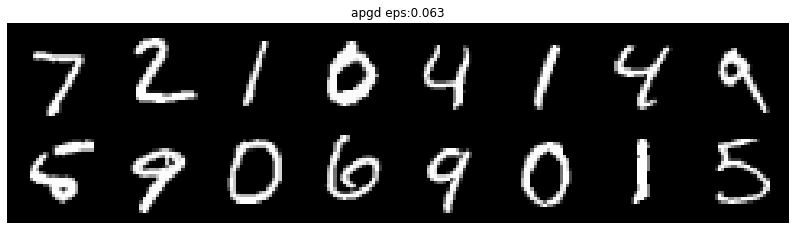

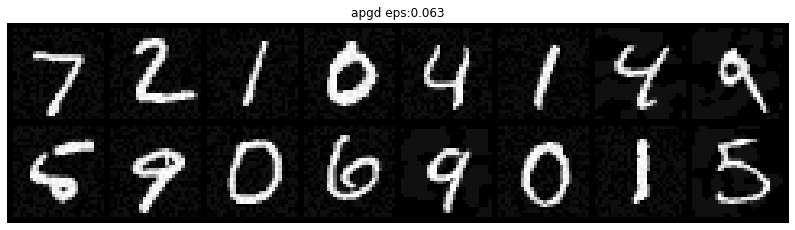

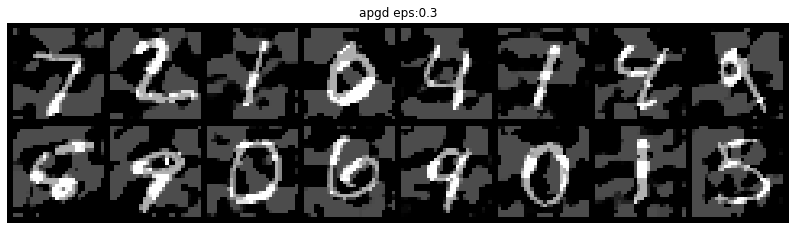

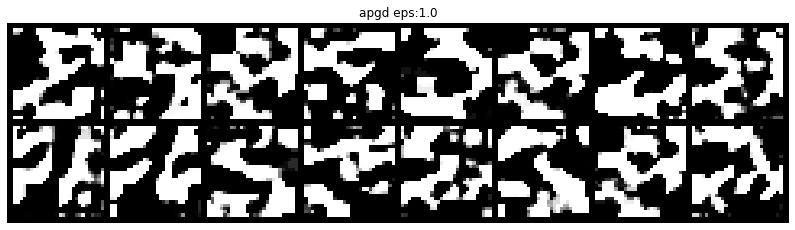

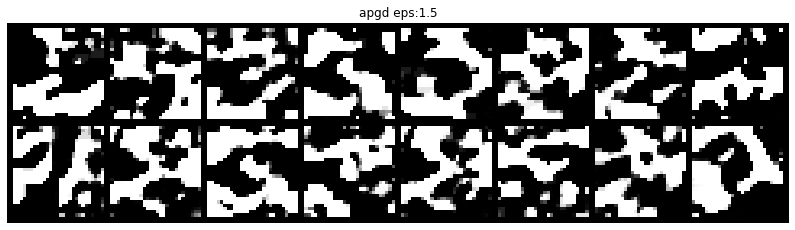

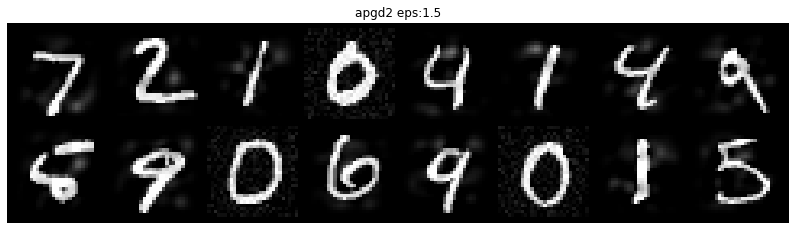

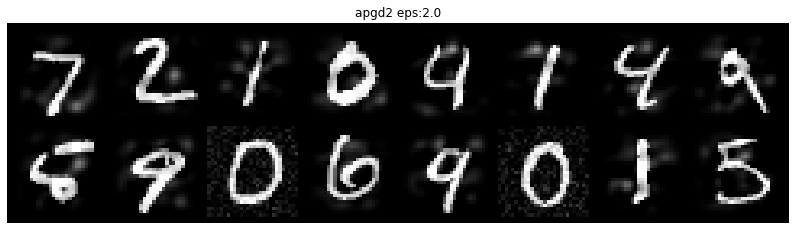

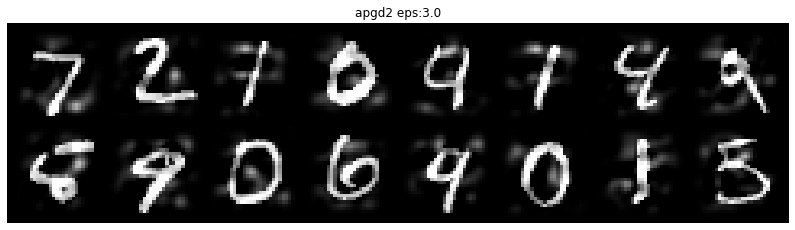

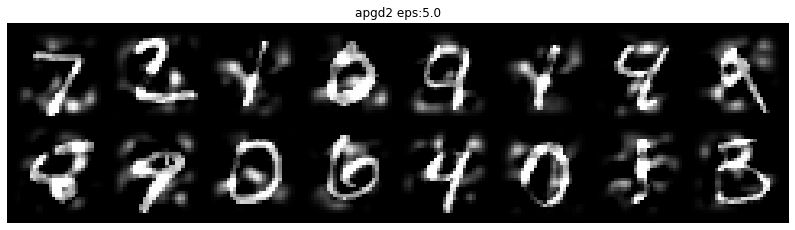

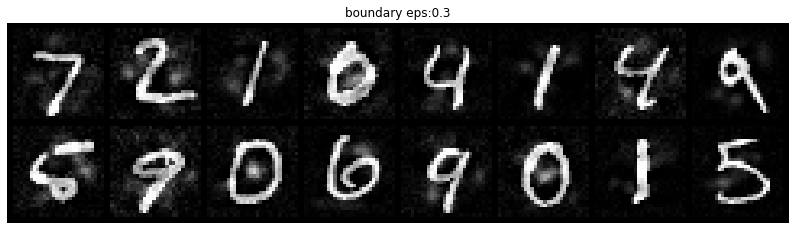

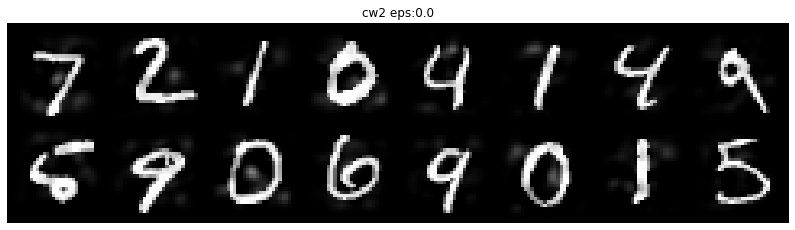

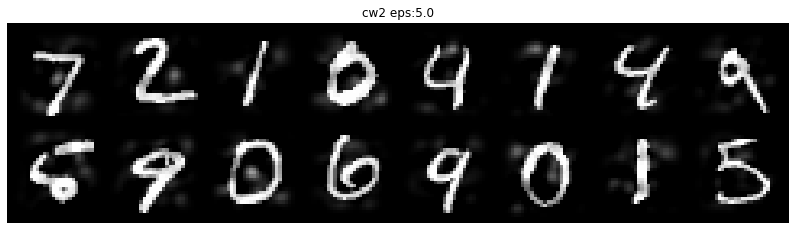

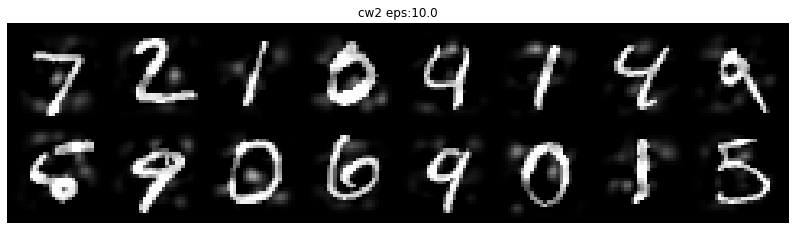

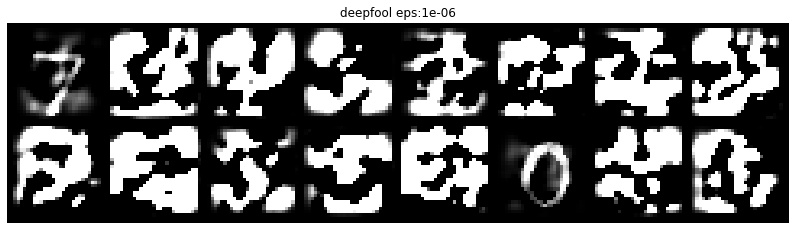

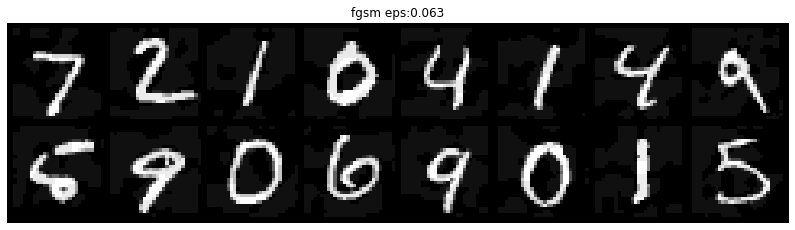

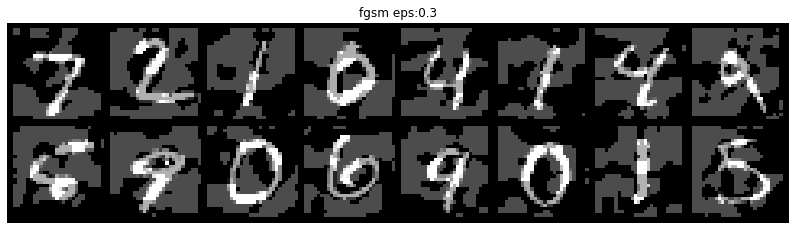

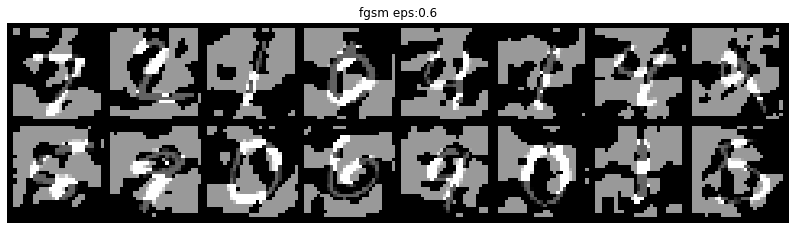

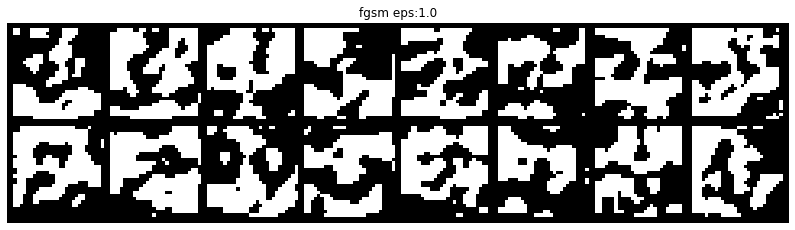

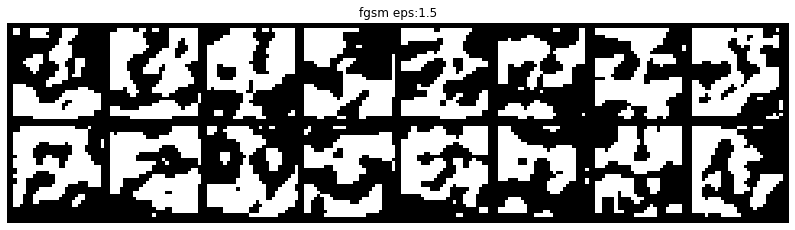

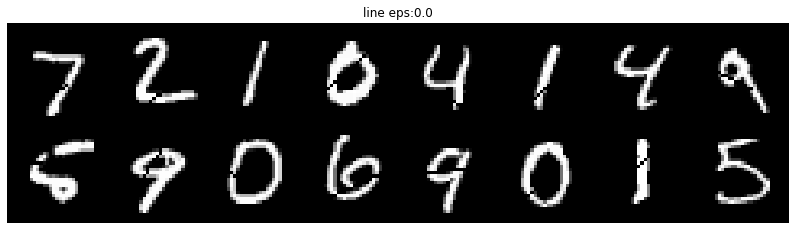

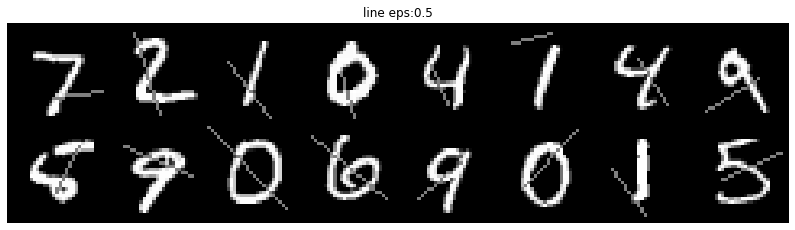

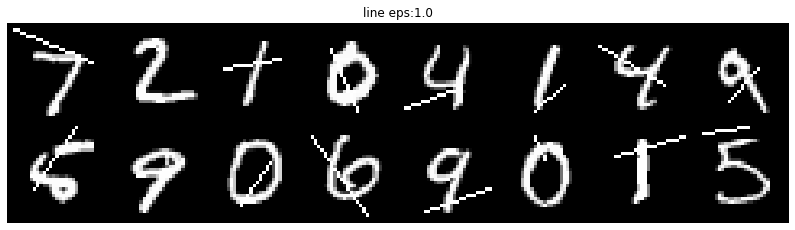

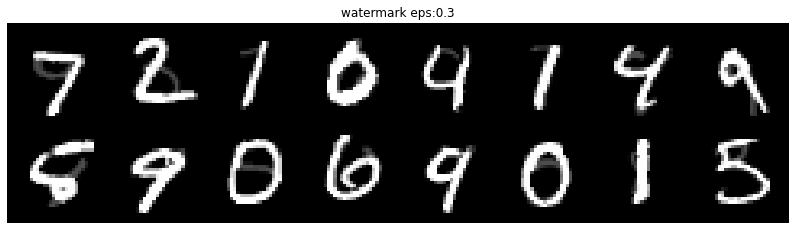

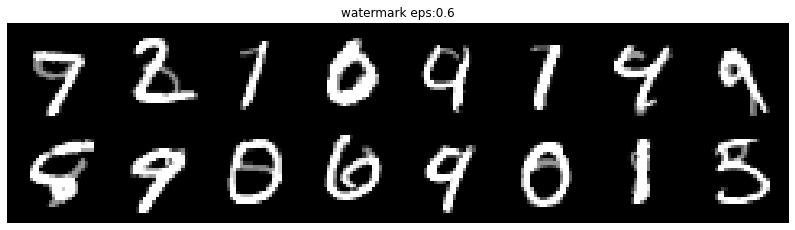

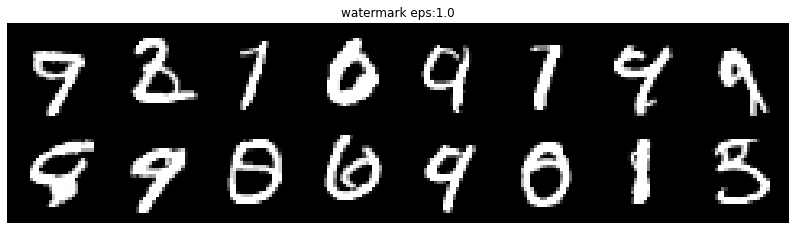

In [33]:

for adv in adv_files:
    show_img(adv)